# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [117]:
# Numerical libraries
import numpy as np   

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing from sklearn to split data
from sklearn.model_selection import train_test_split

#importing Decision Tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

#To calculate accuracy measures and confusion matrix
from sklearn import metrics


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [118]:
df= pd.read_csv("pima-indians-diabetes+(3).csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [120]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [121]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [122]:
df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [124]:
list1=['Pres','skin','mass','Plas']
df[list1]=df[list1].replace(0,df[list1].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [125]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

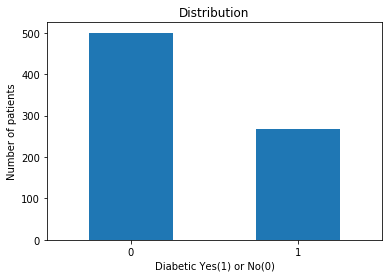

In [133]:
df['class'].value_counts().plot.bar()
plt.xlabel("Diabetic Yes(1) or No(0)")
plt.ylabel("Number of patients")
plt.xticks(rotation=360)
plt.title("Distribution")
plt.show()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [144]:
Y=df.values[:,8]
X=df.values[:,0:7]

import statsmodels.api as sm
import statsmodels.formula.api as smf
#logit1 = smf.GLM(Y,X,family=smf.families.Binomial()).fit()
#formula='class ~ age + pedi'
dta = df[['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass',
              'pedi', 'age','class']].copy()
dta
endog = dta['class']
formula = 'endog ~ Preg + Plas + Pres + skin + test + mass + pedi + age'
#formula = 'endog ~ preg + plas + pres + skin + test + mass + pedi + age + plas*pedi'
logit1=smf.glm(formula=formula,data=dta,family=sm.families.Binomial()).fit()
#logit1.params
print(logit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  endog   No. Observations:                  768
Model:                            GLM   Df Residuals:                      759
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -355.22
Date:                Sun, 06 Oct 2019   Deviance:                       710.44
Time:                        16:09:59   Pearson chi2:                     739.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1994      0.819    -11.232      0.0

In [127]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


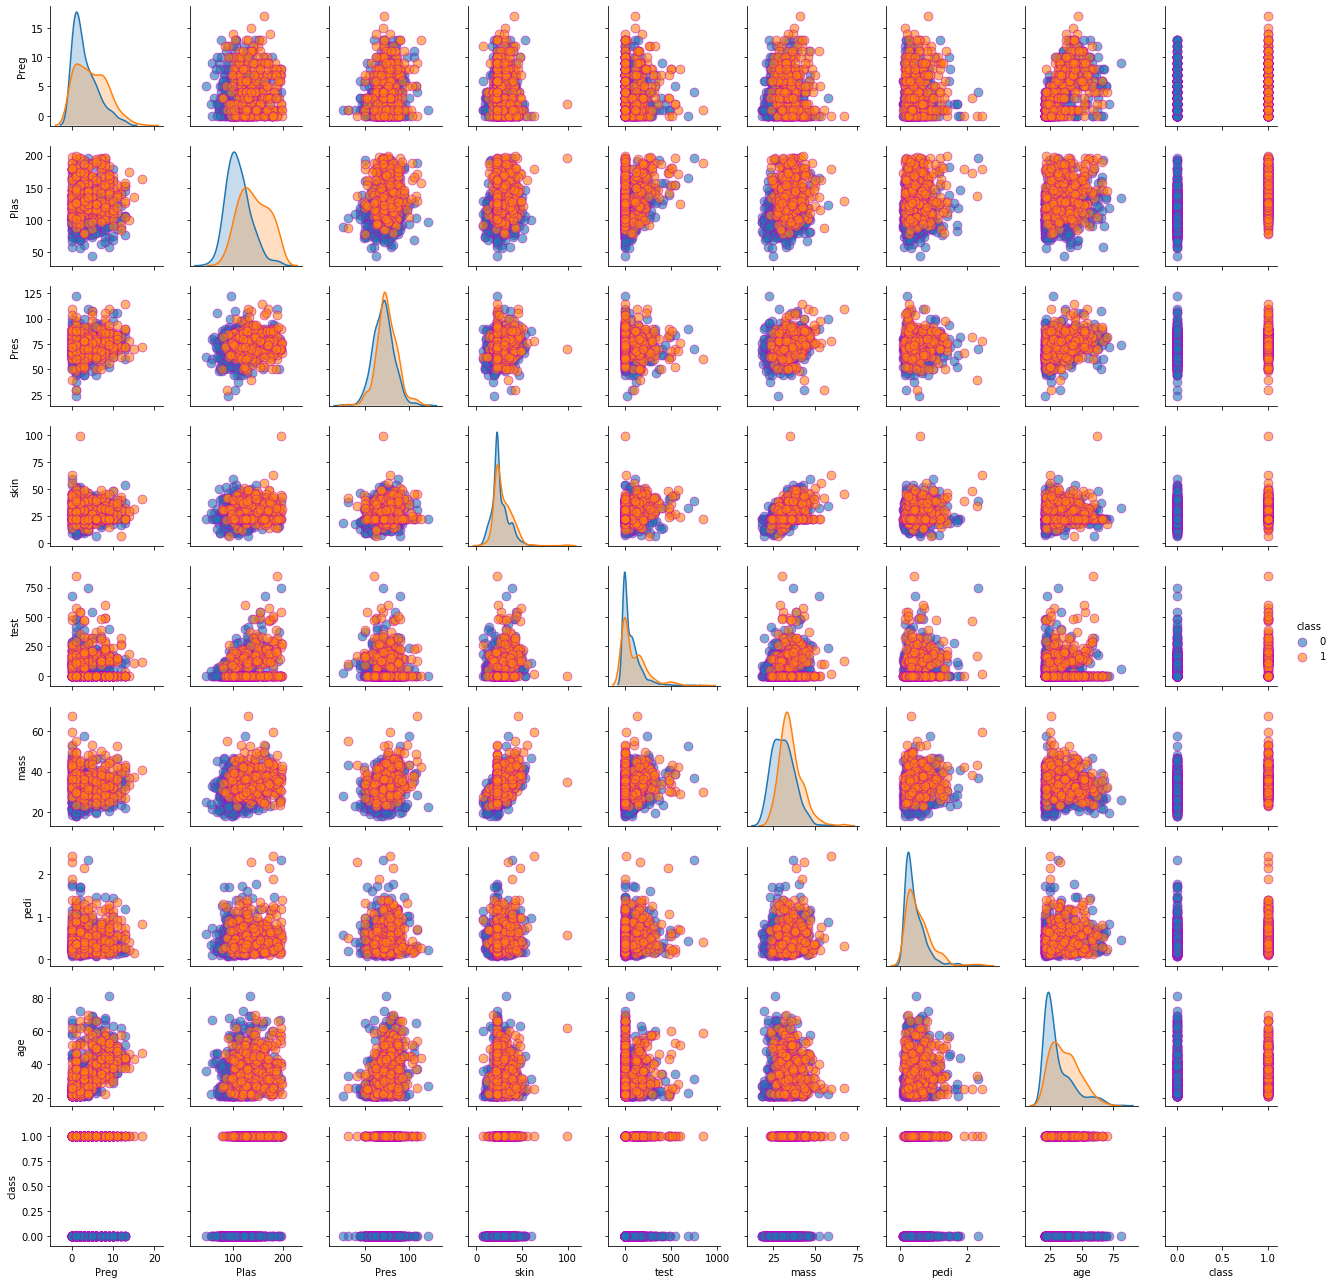

In [128]:
sns.pairplot(df,hue='class',diag_kind='kde',plot_kws={'alpha' :0.6,'s':80,'edgecolor':'m'},size=2)


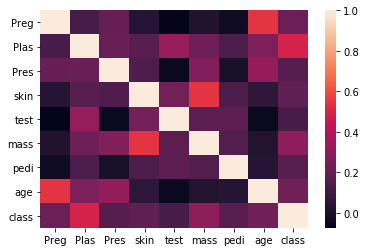

In [129]:
sns.heatmap(df.corr())

#Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [108]:
X=df.drop('class',axis=1)
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print("The Training Set is X : \n",X)
print("\nThe Test Set is Y : \n",y)

The Training Set is X : 
      Preg   Plas  Pres  skin  test  mass   pedi  age
0       6  148.0  72.0  35.0     0  33.6  0.627   50
1       1   85.0  66.0  29.0     0  26.6  0.351   31
2       8  183.0  64.0  23.0     0  23.3  0.672   32
3       1   89.0  66.0  23.0    94  28.1  0.167   21
4       0  137.0  40.0  35.0   168  43.1  2.288   33
5       5  116.0  74.0  23.0     0  25.6  0.201   30
6       3   78.0  50.0  32.0    88  31.0  0.248   26
7      10  115.0  72.0  23.0     0  35.3  0.134   29
8       2  197.0  70.0  45.0   543  30.5  0.158   53
9       8  125.0  96.0  23.0     0  32.0  0.232   54
10      4  110.0  92.0  23.0     0  37.6  0.191   30
11     10  168.0  74.0  23.0     0  38.0  0.537   34
12     10  139.0  80.0  23.0     0  27.1  1.441   57
13      1  189.0  60.0  23.0   846  30.1  0.398   59
14      5  166.0  72.0  19.0   175  25.8  0.587   51
15      7  100.0  72.0  23.0     0  30.0  0.484   32
16      0  118.0  84.0  47.0   230  45.8  0.551   31
17      7  107.0  74

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [116]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [115]:
#Accuracy Score of Test set
dt_model.score(X_test , y_test)

0.7792207792207793

In [112]:
dt_model.score(X_train , y_train)

0.8324022346368715

In [96]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[112  34]
 [ 28  57]]


Print the feature importance of the decision model - Optional

In [132]:
from IPython.display import Image  
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('pima_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
Preg  0.069966
Plas  0.396063
Pres  0.041516
skin  0.016333
test  0.015719
mass  0.222942
pedi  0.086339
age   0.151122
